# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [97]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [98]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [99]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
for i in data.index:
    if data['sex'][i] == 'female':
        data['sex'][i] = '1'
    elif data['sex'][i] == 'male':
        data['sex'][i] = '0'
    elif data['smoker'][i] == 'yes':
        data['smoker'][i] = '1'
    elif data['smoker'][i] == 'no':
        data['smoker'][i] = '0'
    elif data['region'][i] == 'southwest':
        data['region'][i] = '1'
    elif data['region'][i] == 'southeast':
        data['region'][i] = '2'
    elif data['region'][i] == 'northwest':
        data['region'][i] = '3'
    elif data['region'][i] == 'northeast':
        data['region'][i] = '4'

In [101]:
df = pd.get_dummies(data, columns=['region', 'children', 'smoker', 'sex'])

In [102]:
df.head()

,age,bmi,charges,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,sex_0,sex_1
0,19,27.900,16884.92400,0,0,0,1,1,0,0,0,0,0,0,1,0,1
1,18,33.770,1725.55230,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2,28,33.000,4449.46200,0,0,1,0,0,0,0,1,0,0,1,0,1,0
3,33,22.705,21984.47061,0,1,0,0,1,0,0,0,0,0,1,0,1,0
4,32,28.880,3866.85520,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [103]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('once')

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "charges"),
                                        df['charges'],
                                        random_state = 123
                                    )

In [106]:
modelo = DecisionTreeRegressor(
            max_depth         = 3,
            random_state      = 123)

In [107]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Error cuadrático medio usando Random Forest (MSE): 20283982.037145223


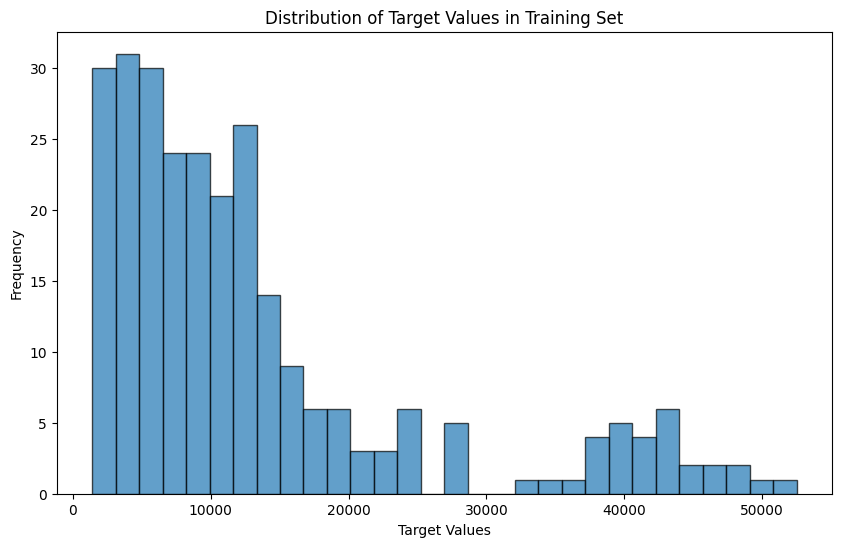

In [108]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=12, criterion='squared_error', random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio usando Random Forest (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, edgecolor='black', label='RF Predictions', alpha=0.7)
plt.title('Distribution of Target Values in Training Set')
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.show()


In [109]:
import math

In [110]:
mse

20283982.037145223

In [111]:
rmse = math.sqrt(mse)
rmse

4503.7741991739795

Error cuadrático medio usando SVR (MSE): 166512016.02211297


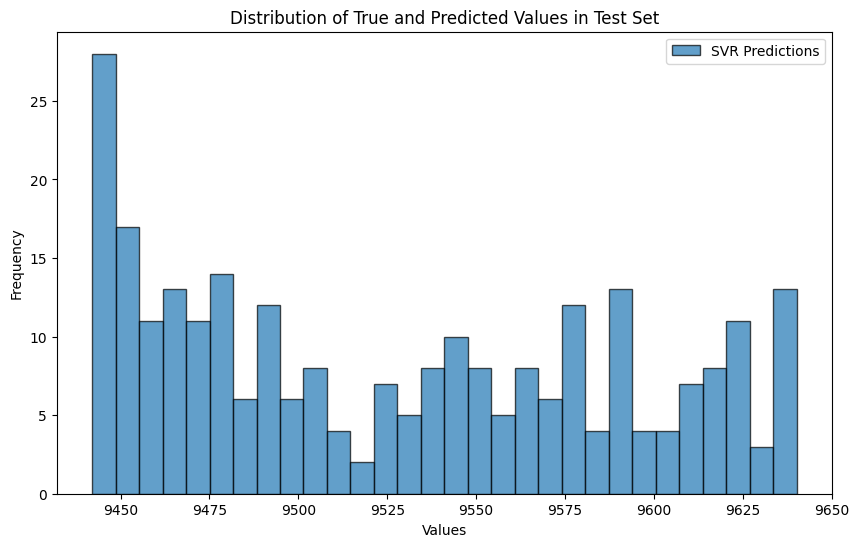

In [112]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio usando SVR (MSE):", mse)

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, edgecolor='black', label='SVR Predictions', alpha=0.7)
plt.title('Distribution of True and Predicted Values in Test Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [113]:
mse

166512016.02211297

In [114]:
rmse = math.sqrt(mse)
rmse

12903.953503562889

Error cuadrático medio (MSE) usando XGBoost: 21321813.27382737


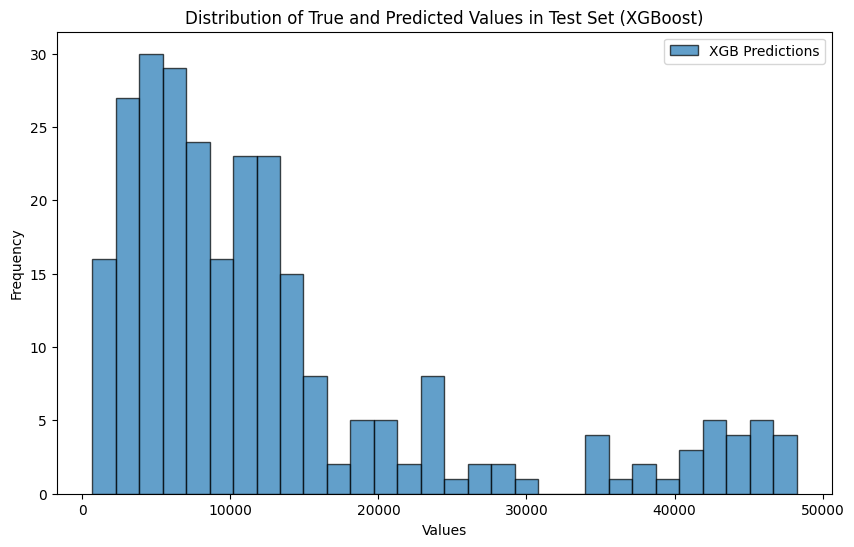

In [115]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse',           
    'eta': 0.1,                       
    'max_depth': 6,                    
    'subsample': 0.8,                  
    'colsample_bytree': 0.8,           
    'seed': 42                         
}

num_round = 100
xgb_model = xgb.train(params, dtrain, num_round)

y_pred = xgb_model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) usando XGBoost:", mse)

plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, edgecolor='black', label='XGB Predictions', alpha=0.7)
plt.title('Distribution of True and Predicted Values in Test Set (XGBoost)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [116]:
mse

21321813.27382737

In [117]:
rmse = math.sqrt(mse)
rmse

4617.554902091298

Error cuadrático medio (MSE) del ensamble: 35152959.79054034


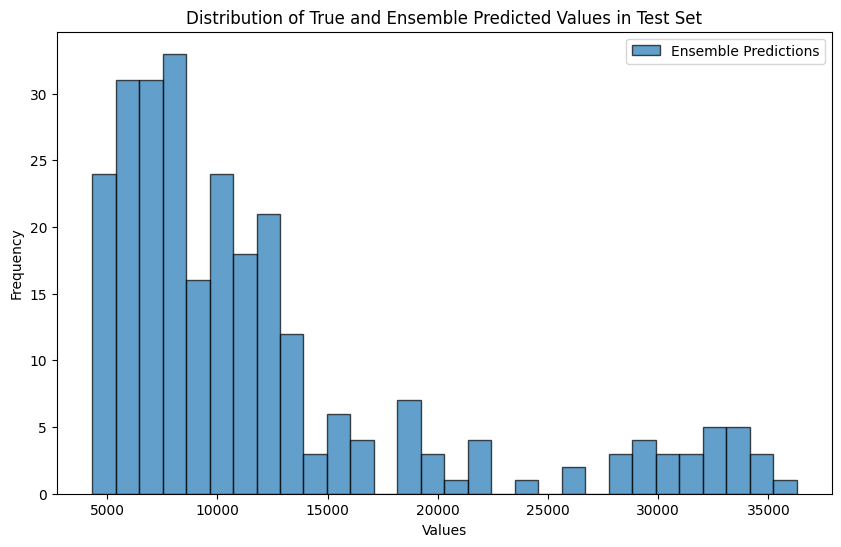

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42)
rf_regressor.fit(X_train, y_train)

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

dtrain = xgb.DMatrix(X_train, label=y_train)
params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'seed': 42}
xgb_model = xgb.train(params, dtrain)

y_pred_rf = rf_regressor.predict(X_test)
y_pred_svr = svr_regressor.predict(X_test)
dtest = xgb.DMatrix(X_test)
y_pred_xgb = xgb_model.predict(dtest)

y_pred_ensemble = (y_pred_rf + y_pred_svr + y_pred_xgb) / 3

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print("Error cuadrático medio (MSE) del ensamble:", mse_ensemble)

plt.figure(figsize=(10, 6))
plt.hist(y_pred_ensemble, bins=30, edgecolor='black', label='Ensemble Predictions', alpha=0.7)
plt.title('Distribution of True and Ensemble Predicted Values in Test Set')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [119]:
mse

21321813.27382737

In [120]:
rmse = math.sqrt(mse)
rmse

4617.554902091298

# Conclusiones

Gracias al análisis de la regresión realizado, y cumpliendo todos los objetivos expuestos hemos podido obtener las siguientes conclusiones:

1. Procesamiento de Datos: Se aplicaron técnicas de procesamiento de datos para limpiar, preprocesar y transformar el conjunto de datos, asegurando la calidad y la adecuación para el modelado. Esto incluyó la gestión de valores faltantes, la codificación de variables categóricas

2. Evaluación de Modelos de Regresión: Se exploraron y evaluaron varios modelos de regresión, incluidos Random Forest (RF), Support Vector Regression (SVR) y XGBoost. Cada modelo se entrenó y evaluó utilizando el conjunto de datos de prueba.

3. Métricas Utilizadas: Para evaluar el rendimiento de los modelos, se utilizaron dos métricas principales: el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE). Estas métricas proporcionaron una medida de la precisión de las predicciones en relación con los valores reales del seguro.

4. Comparación Entre Modelos: Los modelos de RF, SVR y XGBoost demostraron un rendimiento competitivo en términos de MSE y RMSE individualmente. Sin embargo, cada modelo tenía sus propias fortalezas y debilidades en función de la naturaleza de los datos y la complejidad del problema.

5. Ensamble: Se construyó un ensamblaje combinando las predicciones de los modelos RF, SVR y XGBoost.

6. Conclusiones Finales: Se logró desarrollar un modelo de regresión capaz de predecir el valor del seguro con precisión aceptable. El RF demostró ser una estrategia efectiva para mejorar la precisión de las predicciones.